<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1qVZQfvwHjmtEotplba2o13glRBreBzBckdikKwnJpn8/edit#gid=1607208781')
worksheet=wb.worksheet('Datos-CC')
rows = worksheet.get_all_values()
df=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
df.columns = df.iloc[1]
titles=titles.iloc[1:2]
df = df.iloc[3:]
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2,TAL,AL,TCD,CD,TCU,CU,TFE,FE,TIM,IM,TIN,IN,TPD,PD
3,0,153.90,0,154.20,0,166.90,0,173.60,0,156.80,0,130.30,0,216.20
4,1,153.85,1,154.15,1,166.85,1,173.55,1,156.74,1,130.25,1,216.15
5,2,153.80,2,154.10,2,166.81,2,173.51,2,156.69,2,130.19,2,216.11
6,3,153.76,3,154.06,3,166.76,3,173.45,3,156.67,3,130.16,3,216.06
7,4,153.71,4,154.01,4,166.72,4,173.39,4,156.58,4,130.16,4,216.01


In [ ]:
nombres=df.columns[0:14]
for name in nombres:
  df[name]= pd.to_numeric(df[name])

In [ ]:
df.columns[0:14]


Index(['TAL', 'AL', 'TCD', 'CD', 'TCU', 'CU', 'TFE', 'FE', 'TIM', 'IM', 'TIN',
       'IN', 'TPD', 'PD'],
      dtype='object', name=2)

In [ ]:
def f1(x,a,b):
  return a*x+b

In [ ]:
def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

In [ ]:
def iter(x):
  for i in np.arange(0.1,10.0,0.0001):
    y = 3*(8.31446)*(i**2)*np.exp(i)/(np.exp(i)-1)**2
    if (abs(y-x) < 0.001):
      return i

print((np.pi/6)**(1/3))
print(3*(8.31446)*(0.01**2)*np.exp(0.01)/((np.exp(0.01)-1)**2))

0.8059959770082348
24.943172139539843


In [ ]:
i = 0.1
y = 3*(8.31446)*(i**2)*np.exp(i)/(np.exp(i)-1)**2
print(iter(23.92))

0.7102000000000175


In [ ]:
abs(-5)

5

##Aluminio

Incertidumbre Intervalo 1 =  (0.0004572726635009029, 0.017361224274487243)
$R^2$ = 0.997
Incertidumbre Intervalo 3 =  (0.0012541681555494643, 0.24785279187877854)
R^2 = 0.956
M_1 = 148.604 y  M_3 = 136.923 y delta M es =  11.681
CALOR ESPECIFICO =   0.6811 [g] y  =  18.3771 [mol] con error 0.2649
T_E/T = 1.9437 y T_Debye = 446.1900 con ERROR = 0.0425 *100


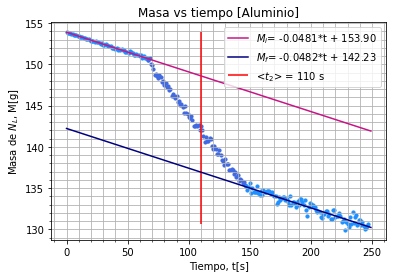

In [ ]:
#Intervalos
l1 =70
l2 =150
l3 =250
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TAL"]
valy1=df.loc[0:l1,"AL"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TAL"]
valy2=df.loc[l1:l2,"AL"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TAL"]
valy3=df.loc[l2:l3,"AL"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="dodgerblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="c",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

#popt, pcov = curve_fit(f1, x, y)
#plt.plot(x, f1(x, *popt), 'r-', label='fit: a=%5.5f, b=%5.5f' % tuple(popt))

#p_11, pcov = curve_fit(f1, x1, y1)
#plt.plot(t1, f1(t1, *p_11), 'b-',color="orangered",label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_11))

#p_13, pcov = curve_fit(f1, x3, y3)
#plt.plot(t1, f1(t1, *p_13), 'b-', color="limegreen", label='Ajuste lineal: m=%5.5f, b=%5.5f' % tuple(p_13))

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %4.4f*t + %4.2f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Aluminio]")
#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))
#CALOR
g_m = 26.9815
Ms = 15.8
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] y  = %8.4f [mol] con error %.4f"%(C_al, (C_al*g_m),((25-(C_al*g_m))/25)))
T_E_T = iter(C_al*g_m)
T_Debye = T_E_T*185/0.8059
print("T_E/T = %.4f y T_Debye = %.4f con ERROR = %.4F *100"%(T_E_T,T_Debye,(abs(1-T_Debye/428))))


##Cadmio

Incertidumbre Intervalo 1 =  (0.00011799832684815071, 0.005978633647067761)
$R^2$ = 1.000
Incertidumbre Intervalo 3 =  (0.00023489654009337175, 0.04218558989703975)
R^2 = 0.998
M_1 = 149.492 y  M_3 = 148.225 y delta M es =  1.267
CALOR ESPECIFICO =   0.1191 [g] y  =  13.3871 [mol] con error 0.4645
T_E/T = 2.8168 y T_Debye = 646.6162 con ERROR = 2.0939 *100


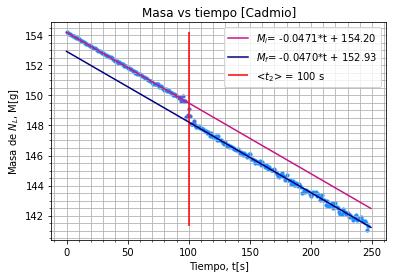

In [ ]:
#Intervalos
l1 =92
l2 =108
l3 =250
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TCD"]
valy1=df.loc[0:l1,"CD"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TCD"]
valy2=df.loc[l1:l2,"CD"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TCD"]
valy3=df.loc[l2:l3,"CD"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="dodgerblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="dodgerblue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %4.4f*t + %4.2f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))
#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Cadmio]")
#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))
#CALOR
g_m = 112.40
Ms = 9.8
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] y  = %8.4f [mol] con error %.4f"%(C_al, (C_al*g_m),((25-(C_al*g_m))/25)))
T_E_T = iter(C_al*g_m)
T_Debye = T_E_T*185/0.8059
print("T_E/T = %.4f y T_Debye = %.4f con ERROR = %.4F *100"%(T_E_T,T_Debye,(abs(1-T_Debye/209))))

##COBRE

Incertidumbre Intervalo 1 =  (6.180670313866971e-05, 0.0023466087533898262)
$R^2$ = 1.000
Incertidumbre Intervalo 3 =  (0.00015625525816214927, 0.03296383024866307)
R^2 = 0.999
M_1 = 161.182 y  M_3 = 146.826 y delta M es =  14.356
CALOR ESPECIFICO =   0.3013 [g] y  =  19.1446 [mol] con error 0.2342
T_E/T = 1.8052 y T_Debye = 414.3963 con ERROR = 0.2064 *100


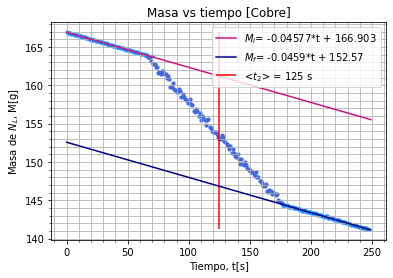

In [ ]:
#Intervalos
l1 =70
l2 =180
l3 =250
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TCU"]
valy1=df.loc[0:l1,"CU"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TCU"]
valy2=df.loc[l1:l2,"CU"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TCU"]
valy3=df.loc[l2:l3,"CU"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="dodgerblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="dodgerblue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %5.5f*t + %4.3f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Cobre]")
#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))
#CALOR
g_m = 63.546
Ms = 43.9
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] y  = %8.4f [mol] con error %.4f"%(C_al, (C_al*g_m),((25-(C_al*g_m))/25)))
T_E_T = iter(C_al*g_m)
T_Debye = T_E_T*185/0.8059
print("T_E/T = %.4f y T_Debye = %.4f con ERROR = %.4F *100"%(T_E_T,T_Debye,(abs(1-T_Debye/343.5))))

##HIERRO


Incertidumbre Intervalo 1 =  (0.0008872578110720485, 0.03880831430951787)
$R^2$ = 0.988
Incertidumbre Intervalo 3 =  (0.0014725292691155105, 0.2750082679148761)
R^2 = 0.943
M_1 = 168.455 y  M_3 = 159.055 y delta M es =  9.400
CALOR ESPECIFICO =   0.3082 [g] y  =  17.2111 [mol] con error 0.3116
T_E/T = 2.1489 y T_Debye = 493.2951 con ERROR = 0.0496 *100


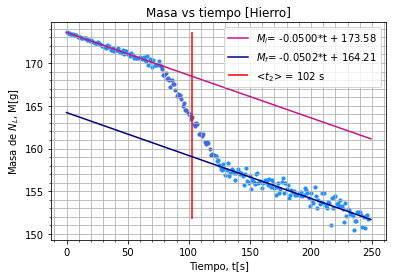

In [ ]:
#Intervalos
l1 =80
l2 =125
l3 =250
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TFE"]
valy1=df.loc[0:l1,"FE"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TFE"]
valy2=df.loc[l1:l2,"FE"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TFE"]
valy3=df.loc[l2:l3,"FE"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="dodgerblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="dodgerblue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %4.4f*t + %4.2f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))
#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Hierro]")
#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))
#CALOR
g_m = 55.847
Ms = 28.1
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] y  = %8.4f [mol] con error %.4f"%(C_al, (C_al*g_m),((25-(C_al*g_m))/25)))
T_E_T = iter(C_al*g_m)
T_Debye = T_E_T*185/0.8059
print("T_E/T = %.4f y T_Debye = %.4f con ERROR = %.4F *100"%(T_E_T,T_Debye,(abs(1-T_Debye/470))))

##IMAN

Incertidumbre Intervalo 1 =  (0.001855585565297873, 0.0597395609625888)
$R^2$ = 0.970
Incertidumbre Intervalo 3 =  (0.0020687684708300767, 0.37325639383724524)
R^2 = 0.914
M_1 = 152.021 y  M_3 = 144.682 y delta M es =  7.339
CALOR ESPECIFICO =   0.2292 [g] y  =  12.7999 [mol] con error 0.4880


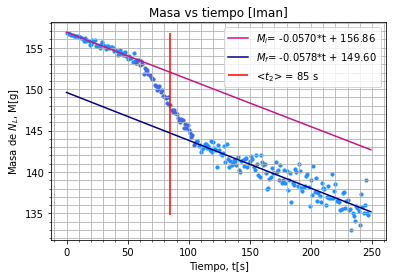

In [ ]:
#Intervalos
l1 =60
l2 =110
l3 =250
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TIM"]
valy1=df.loc[0:l1,"IM"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TIM"]
valy2=df.loc[l1:l2,"IM"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TIM"]
valy3=df.loc[l2:l3,"IM"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="dodgerblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="dodgerblue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %4.4f*t + %4.2f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))

#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Iman]")

#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))

#CALOR
g_m = 55.847
Ms = 29.5
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] "%(C_al))

##INDIO

Incertidumbre Intervalo 1 =  (0.0011602225800647161, 0.021951565396685625)
$R^2$ = 0.990
Incertidumbre Intervalo 3 =  (0.0028634686361684145, 0.21278397713805355)
R^2 = 0.880
M_1 = 128.186 y  M_3 = 127.256 y delta M es =  0.930
CALOR ESPECIFICO =   0.1382 [g] y  =  15.8715 [mol] con error 0.3651
T_E/T = 2.3813 y T_Debye = 546.6441 con ERROR = 3.2376 *100


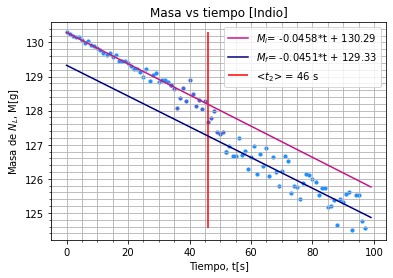

In [ ]:
#Intervalos
l1 =37
l2 =55
l3 =100
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TIN"]
valy1=df.loc[0:l1,"IN"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TIN"]
valy2=df.loc[l1:l2,"IN"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TIN"]
valy3=df.loc[l2:l3,"IN"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="dodgerblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="dodgerblue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %4.4f*t + %4.2f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))
#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Indio]")

#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))

#CALOR
g_m = 114.82
Ms = 6.2
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] y  = %8.4f [mol] con error %.4f"%(C_al, (C_al*g_m),((25-(C_al*g_m))/25)))
T_E_T = iter(C_al*g_m)
T_Debye = T_E_T*185/0.8059
print("T_E/T = %.4f y T_Debye = %.4f con ERROR = %.4F *100"%(T_E_T,T_Debye,(abs(1-T_Debye/129))))

##PLOMO

Incertidumbre Intervalo 1 =  (0.0008688978937259754, 0.042018094342141384)
$R^2$ = 0.986
Incertidumbre Intervalo 3 =  (0.0005085263991455964, 0.09606276804763572)
R^2 = 0.993
M_1 = 210.725 y  M_3 = 202.625 y delta M es =  8.100
CALOR ESPECIFICO =   0.1172 [g] y  =  24.2740 [mol] con error 0.0290
T_E/T = 0.5717 y T_Debye = 131.2377 con ERROR = 0.2499 *100


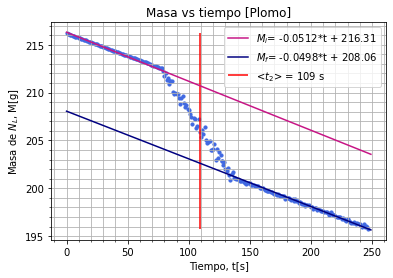

In [ ]:
#PLOMO
#Intervalos
l1 =88
l2 =130
l3 =250
t1 = range(l3)
Mx = (l1+l2)/2

valx1=df.loc[0:l1,"TPD"]
valy1=df.loc[0:l1,"PD"]
x1=valx1.values 
y1=valy1.values
valx2=df.loc[l1:l2,"TPD"]
valy2=df.loc[l1:l2,"PD"]
x2=valx2.values 
y2=valy2.values
valx3=df.loc[l2:l3,"TPD"]
valy3=df.loc[l2:l3,"PD"]
x3=valx3.values 
y3=valy3.values

plt.vlines(x=Mx, ymin=y3[np.size(y3)-1], ymax=y1[0], color='red', label ='<$t_2$> = %d s' % (Mx))
plt.scatter(x1,y1,color="royalblue",s=10)
plt.scatter(x2,y2,color="royalblue",s=10)
plt.scatter(x3,y3,color="royalblue",s=10)
plt.minorticks_on()
plt.grid(b=True,which="both")

gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
plt.plot(t1, f1(t1, gradient1, intercept1), 'b-',color="mediumvioletred",label='$M_i$= %4.4f*t + %4.2f' % (gradient1, intercept1))
gradient3, intercept3, r_value3, p_value3, std_err3 = linregress(x3,y3)
plt.plot(t1, f1(t1, gradient3, intercept3), 'b-',color="navy",label='$M_f$= %4.4f*t + %4.2f' % (gradient3, intercept3))
#plt.xlim([-4, 0])
plt.grid(b=True,which="both")
plt.legend(loc="upper right") # lower left
plt.ylabel("Masa de $N_L$, M[g]")
plt.xlabel("Tiempo, t[s]")
plt.title("Masa vs tiempo [Plomo]")

#INCERTIDUMBRES
print("Incertidumbre Intervalo 1 = ",ERROR(x1,y1,gradient1,intercept1)) 
print("$R^2$ = %4.3f" % abs(r_value1))
print("Incertidumbre Intervalo 3 = ", ERROR(x3,y3,gradient3,intercept3)) 
print("R^2 = %4.3f" % abs(r_value3))

#CALOR
g_m = 207.2
Ms = 63.7
M1 = gradient1 * Mx + intercept1
M3 = gradient3 * Mx + intercept3
dM = M1-M3
print("M_1 = %5.3f y  M_3 = %5.3f y delta M es =  %5.3f" % (M1,M3,dM))
C_al = -dM*199/(-216*Ms)
print("CALOR ESPECIFICO = %8.4f [g] y  = %8.4f [mol] con error %.4f"%(C_al, (C_al*g_m),((25-(C_al*g_m))/25)))
T_E_T = iter(C_al*g_m)
T_Debye = T_E_T*185/0.8059
print("T_E/T = %.4f y T_Debye = %.4f con ERROR = %.4F *100"%(T_E_T,T_Debye,(abs(1-T_Debye/105))))

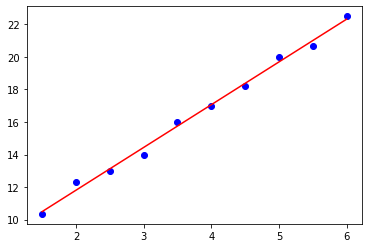

In [ ]:
#Ejemplo de prueba
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

x = np.array([1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
y = np.array([10.35,12.3,13,14.0,16,17,18.2,20,20.7,22.5])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()